In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#ścieżki do plików
waluty1_path = 'waluty1.xls'
listofcountries_path = 'alphabetical-list-of-countries2020.xlsx'
iris_path = 'iris.csv'

> Wyświetlenie wykresów liniowy średnich kursów **miesięcznych** walut 

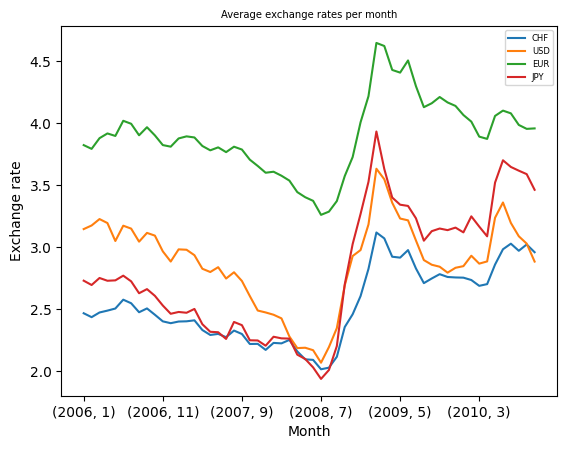

In [2]:

currencies = pd.read_excel(waluty1_path)
labels = ['CHF', 'USD', 'EUR', 'JPY']
keys = ['rok', 'mies']
avgs = [currencies.groupby(keys)[labels[i]].mean() for i in range(4)]
for currency in avgs:
    currency.plot()
plt.rcParams['figure.dpi'] = 150
plt.rcParams.update({'font.size': 6})
plt.legend()
plt.xlabel('Month')
plt.ylabel('Exchange rate')
plt.title('Average exchange rates per month')
plt.show()

Wykres kolumnowy przedstawiający średnie kursy czterech walut w każdym roku na podstawie kursów dziennych zawartych w pliku waluty1.xls

<AxesSubplot: xlabel='rok'>

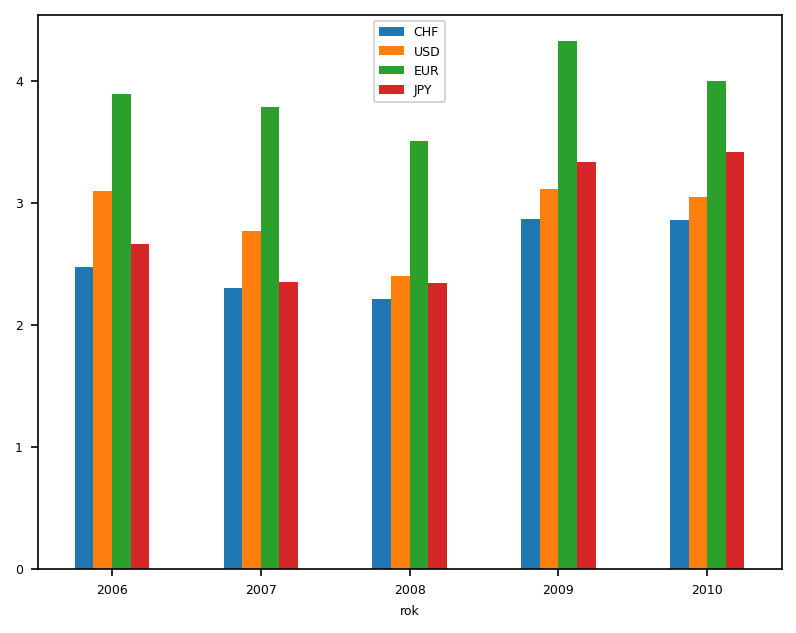

In [3]:
k = pd.read_excel("waluty1.xls")

k.head()
k = k.drop(columns=['dzien','mies']).set_index("rok").groupby("rok").mean()
k.plot.bar(rot= 0)

> Wyświetlenie wykresow słupkowych pokazujący liczbę ludności wszystkich dużych państw świata tj. liczących więcej niż 35 milionów mieszkańców w kolejności od najmniejszego do największego. 

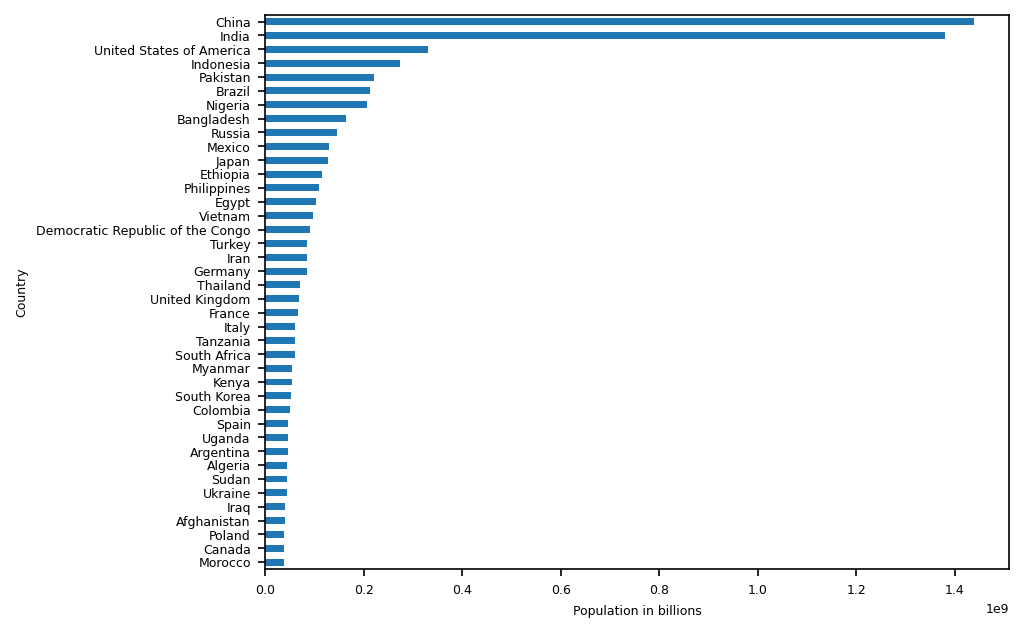

In [4]:
countries = pd.read_excel(listofcountries_path, header = 4, usecols = range(2, 6))
countries = countries[countries.Population > 35*10**6].sort_values(by = 'Population')
plt.rcParams['figure.dpi'] = 150
plt.rcParams.update({'font.size': 6})
countries.loc[:, ['Country', 'Population']].plot.barh(x = 'Country', legend = False)
plt.xlabel('Population in billions')
plt.show()

> Histogramy poszczególnych atrybutów zbioru danych `iris` z podziałem na klasy, oraz macierz wykresów punktowych.

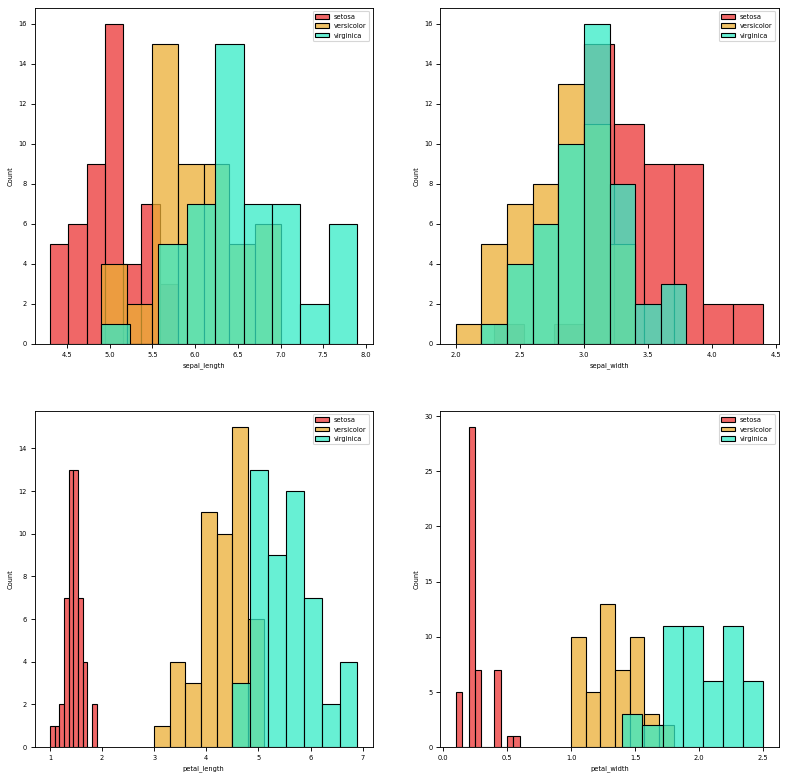

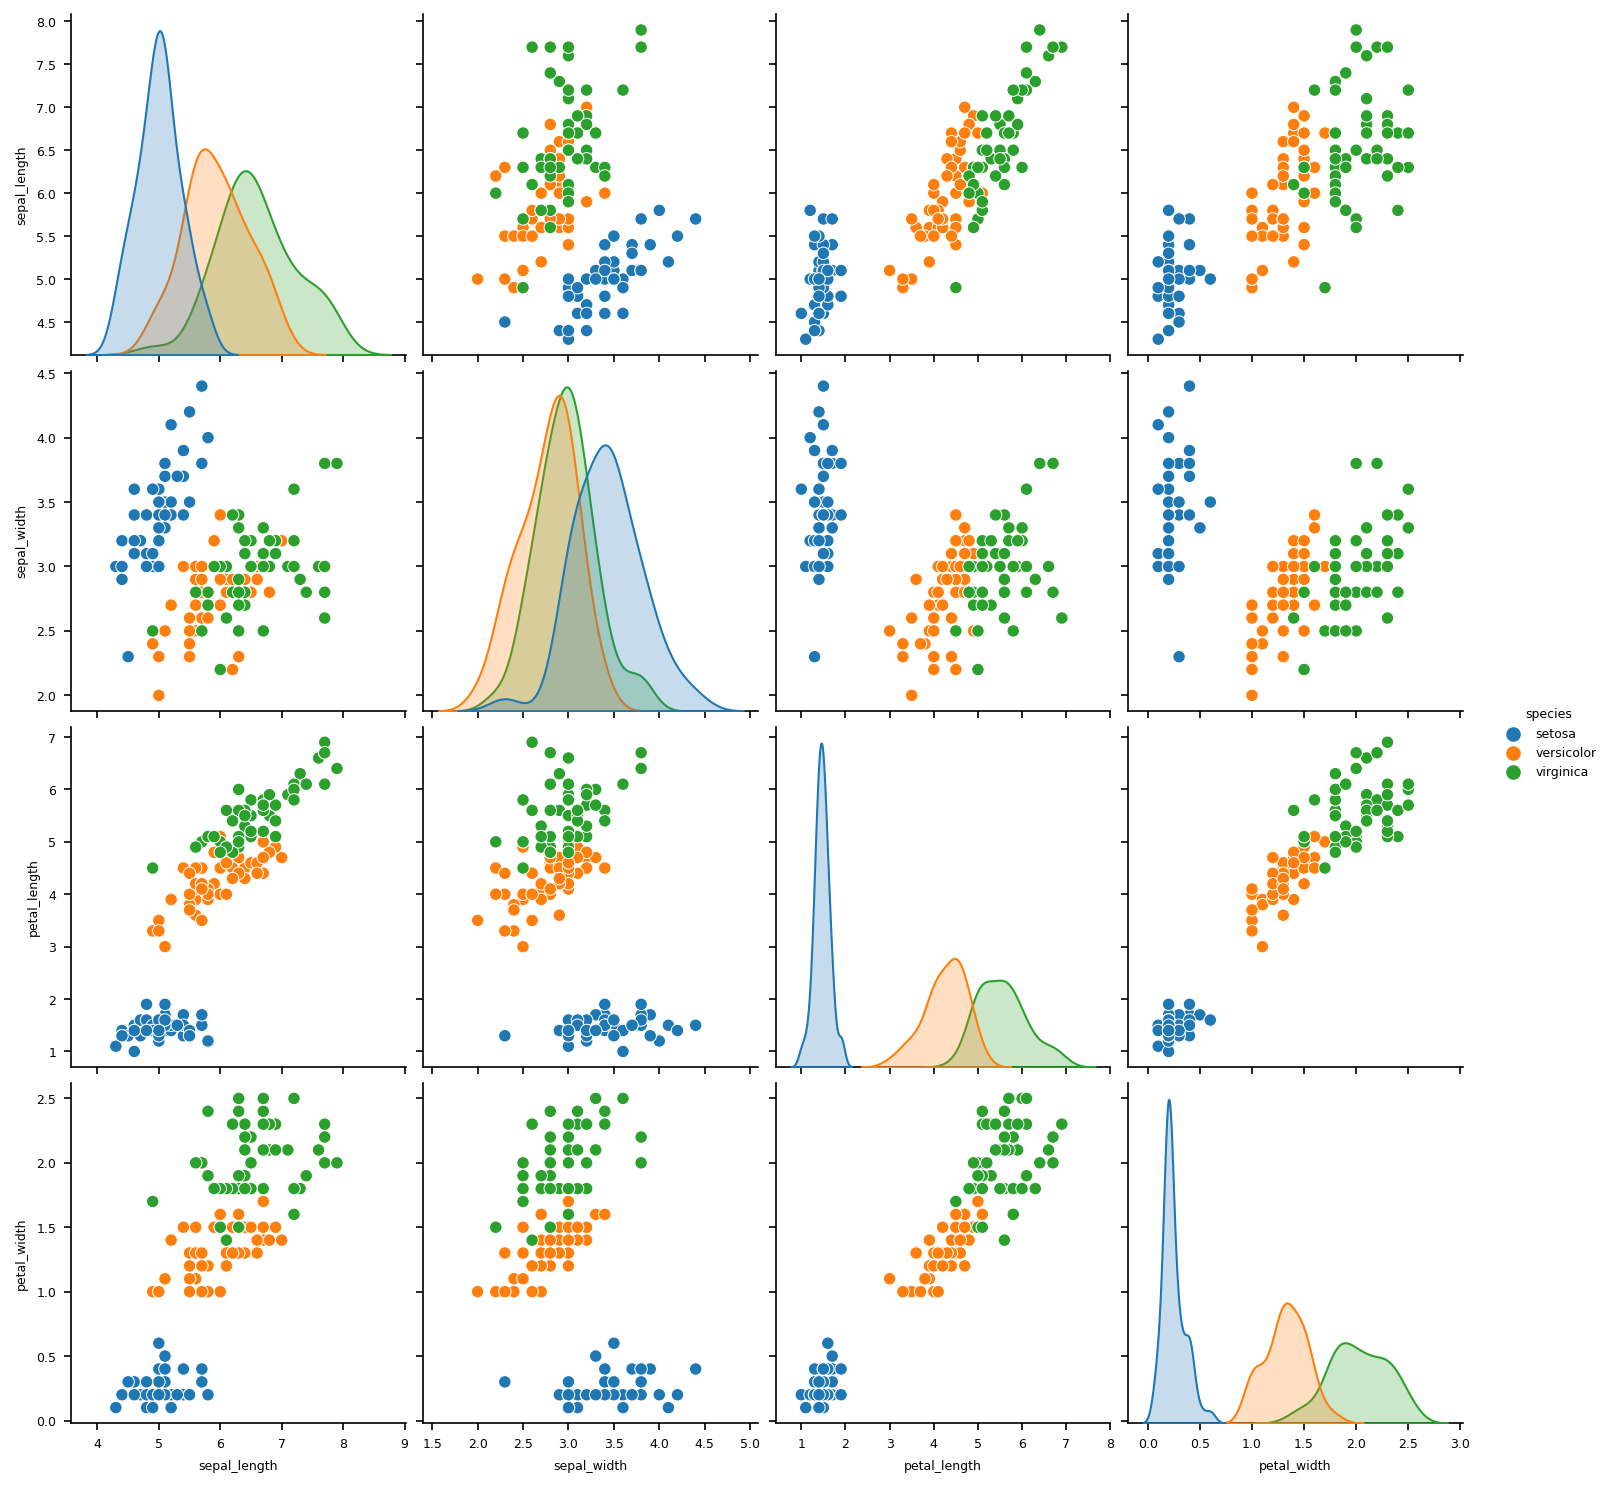

In [5]:
iris = pd.read_csv(iris_path, usecols = range(1,6))
plt.figure(figsize = (12, 12), dpi = 80)
sns.set_color_codes = True
attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
colors = ['#eb3434', '#ebae34', '#34ebc6']
i = 1
for attribute in attributes:
    plt.subplot(2, 2, i)
    i += 1
    j = 0
    for species in np.unique(iris.species):
        sns.histplot(iris.loc[iris.species == species, attribute], label = species, color = colors[j])
        j += 1
    plt.legend()
sns.pairplot(iris, kind = 'scatter', hue = 'species')
plt.show()